In [1]:
### Import Statements ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

# Loading the Dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Visualizing missing Values

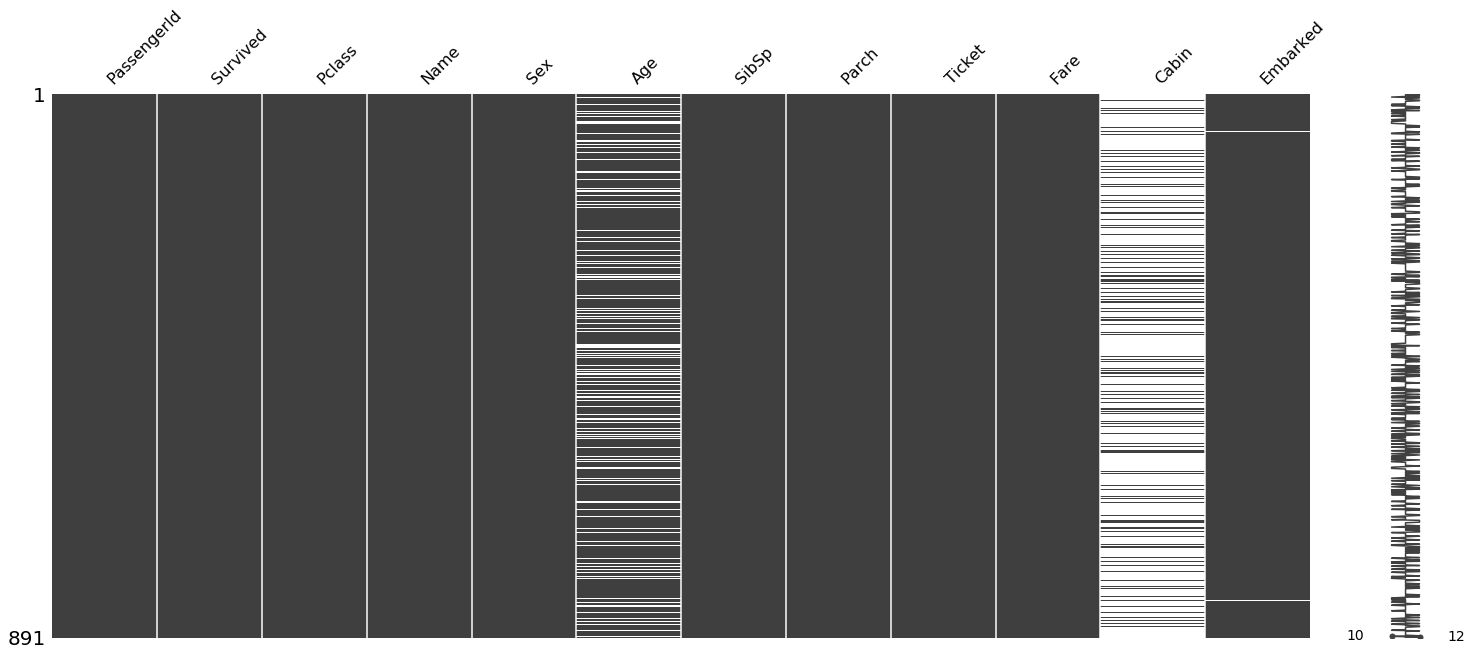

In [4]:
ms.matrix(train_data)

We can observe that there are missing values in features Age, Cabin, Embarked.

In [5]:
def get_combined_data():
    #removing the targets from the training data 
    global test_data
    train_data.drop('Survived',axis =  1, inplace=True)

    # merging train data and test data for feature engineering
    combined = train_data.append(test_data)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    return combined

# Cleaning the data

In [6]:
combined_data = get_combined_data()

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [8]:
combined_data['Cabin'].count()

295

There are 1014 rows does not have the Cabin data.

In [9]:
def droping_features(feature_names,data):
    data.drop(feature_names,axis=1,inplace=True)

In [10]:
def processing_cabin(data):
    data['Cabin'].fillna('U',inplace=True)
    data['Cabin'] = data['Cabin'].map(lambda x : x[0])

In [11]:
processing_cabin(combined_data)

Still we have missing values in Embarked, Age and Fare. As age is an important feature we can not drop it. Instead we are going to fill the missing values.

In [12]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


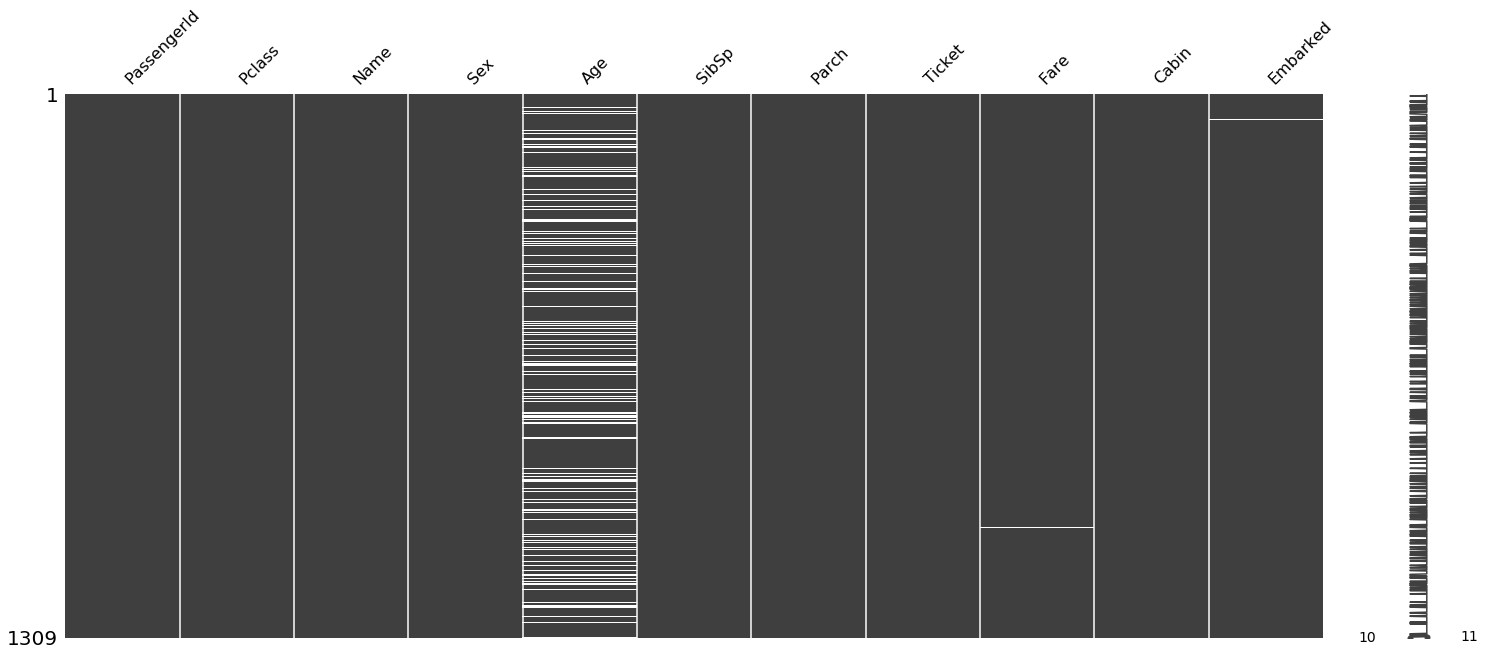

In [13]:
ms.matrix(combined_data)

In [14]:
## filling the missing values in Fare with the mean ##
combined_data.loc[combined_data['Fare'].isnull(),'Fare']  = combined_data["Fare"].mean()

In [15]:
combined_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
## filling the missing values in Embarked with the most frequent value i.e 'S' ##
combined_data.loc[combined_data['Embarked'].isnull(),'Embarked']  = 'S'

In [17]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [18]:
def process_title(data):
    data['Title'] = data['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
    """
    Mr, Miss, Mrs, Master, Col, Rev, Ms, Dona, Dr  -- Titles
    """
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    data['Title'] = data['Title'].map(Title_Dictionary)

In [19]:
process_title(combined_data)

In [20]:
grouped_train = combined_data.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

In [21]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [22]:
grouped_test = combined_data.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [23]:
grouped_median_test

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [24]:
def fill_ages(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']

In [25]:
def processing_ages(data):
    data.head(891)['Age'] = data.head(891).apply(lambda row : fill_ages(row,grouped_median_train) if np.isnan(row['Age']) else row['Age']
                                                 ,axis=1)
    data.iloc[891:]['Age'] = data.iloc[891:].apply(lambda row : fill_ages(row,grouped_median_test) if np.isnan(row['Age']) else row['Age']
                                                   ,axis=1)

In [26]:
processing_ages(combined_data)

F:\DATASCIENCE\softwares\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\DATASCIENCE\softwares\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
def processing_family(data):
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    # introducing other features based on the family size
    data['Single'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

In [28]:
processing_family(combined_data)

In [29]:
def converting_categorical(feature,data):
    return pd.get_dummies(data[feature],drop_first=True,prefix=feature)

In [30]:
sex = converting_categorical('Sex',combined_data)
embark = converting_categorical('Embarked',combined_data)
cabin = converting_categorical('Cabin',combined_data)
title = converting_categorical('Title',combined_data)

droping_features(['Sex','Embarked','Name','Ticket','Cabin','PassengerId','SibSp','Parch','Title'],combined_data)
combined_data = pd.concat([combined_data,sex,embark,cabin,title],axis=1)

In [31]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
Pclass           1309 non-null int64
Age              1309 non-null float64
Fare             1309 non-null float64
FamilySize       1309 non-null int64
Single           1309 non-null int64
SmallFamily      1309 non-null int64
LargeFamily      1309 non-null int64
Sex_male         1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(5), uint8(16

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
def recover_train_test_target_values():
    data = pd.read_csv('train.csv')
    targets = data.Survived
    train = combined_data.head(891)
    test = combined_data.iloc[891:]
    return train, test, targets

In [34]:
train , test , targets = recover_train_test_target_values()

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
def build_model(flag):
    """
    For the first time flag will be true. GridSearchCV runs and we get the best parameters.
    From the second run flag will be flase and we can use the best parameters generated by GridSearchCV.
    """
    if flag:
        parameters = {
                     'max_depth' : [1,3,4],
                     'n_estimators': [10,30,50],
                     'max_features': ['sqrt', 'auto', 'log2'],
                     'min_samples_split': [10,20,30],
                     'min_samples_leaf': [1, 3, 10],
                     'bootstrap': [True, False],
                     }
        pre_model = RandomForestClassifier()    
        model = GridSearchCV(pre_model,param_grid=parameters)
        model.fit(train, targets)
        print('Best parameters: {}'.format(model.best_params_))
    else:
        """
        got these best parameter values from  gridSearchCv -- RandomForstClassifier
        Best parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'log2', 
                        'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
        Best parameters: {'loss': 'exponential', 'max_depth': 5, 'max_features': 'auto', 
                        'min_samples_split': 5, 'n_estimators': 50} -- GradientBoostingClassifier
        """
        
        model = RandomForestClassifier(bootstrap = False, max_depth = 4, max_features = 'sqrt', 
                        min_samples_leaf = 3, min_samples_split = 30, n_estimators = 50)
#       model = GradientBoostingClassifier(loss= 'exponential', max_depth= 5, max_features= 'auto', 
#                         min_samples_split= 5, n_estimators= 50)
        model.fit(train,targets)
    return model

In [37]:
model = build_model(False)

In [38]:
predictions =  model.predict(test)

In [39]:
## saving the predictions to a csv file ##
final_result = pd.DataFrame({'PassengerId' : test_data['PassengerId'],'Survived': predictions})
final_result['PassengerId'] = final_result['PassengerId'].astype(int)
filename = 'output.csv'
final_result.to_csv(filename,index=False)